In [1]:
import json
from os.path import isfile

hypothesis_evidence_lst=[]
with open('/kaggle/input/nlp-project-dataset/Training data/train.json','r') as f:
    train_json=json.load(f)
    for k in train_json:
        line=train_json[k]
#         if isfile('../data/Training_data/CT json/{}.json'.format(line['Primary_id'])):
        premises=json.load(open('/kaggle/input/nlp-project-dataset/Training data/CT json/{}.json'.format(line['Primary_id'])))
        hypothesis_evidence_lst.append([
            line['Statement'],
            json.dumps([premises[line['Section_id']][idx] for idx in line['Primary_evidence_index']]),
            line['Label']
        ])
        if 'Secondary_id' in line:
            premises=json.load(open('/kaggle/input/nlp-project-dataset/Training data/CT json/{}.json'.format(line['Secondary_id'])))
            hypothesis_evidence_lst[-1][1]=json.dumps(
                json.loads(hypothesis_evidence_lst[-1][1])+[premises[line['Section_id']][idx] for idx in line['Secondary_evidence_index']]
            )

In [2]:
len(hypothesis_evidence_lst)

1700

In [3]:
hypothesis_evidence_lst[:3]

[['All the primary trial participants do not receive any oral capecitabine, oral lapatinib ditosylate or cixutumumab IV, in conrast all the secondary trial subjects receive these.',
  '["INTERVENTION 1: ", "  Diagnostic (FLT PET)", "  Patients with early stage, ER positive primary breast cancer undergo FLT PET scan at baseline and 1-6 weeks after the start of standard endocrine treatment. The surgery follows 1-7 days after the second FLT PET scan.", "  Tracer used in the FLT PET (positron emission tomography) scanning procedure: [F18] fluorothymidine.", "  Positron Emission Tomography: Undergo FLT PET", "  Laboratory Biomarker Analysis: Correlative studies - Ki67 staining of the tumor tissue in the biopsy and surgical specimen.", "INTERVENTION 1: ", "  Arm A", "  Patients receive oral capecitabine twice daily on days 1-14 and oral lapatinib ditosylate once daily on days 1-21. Courses repeat every 21 days in the absence of disease progression or unacceptable toxicity. lapatinib ditosyla

In [4]:
import pandas as pd

train_df=pd.DataFrame(hypothesis_evidence_lst,columns=['hypothesis','evidences','label'])
train_df

,hypothesis,evidences,label
0,All the primary trial participants do not rece...,"[""INTERVENTION 1: "", "" Diagnostic (FLT PET)"",...",Contradiction
1,"Patients with Platelet count over 100,000/mm¬¨...","["" PATIENT CHARACTERISTICS:"", "" ANC 1,500/m...",Contradiction
2,Heart-related adverse events were recorded in ...,"[""Adverse Events 1:"", "" Supraventricular tach...",Entailment
3,Adult Patients with histologic confirmation of...,"[""Inclusion Criteria:"", "" Patients with histo...",Contradiction
4,Laser Therapy is in each cohort of the primary...,"[""INTERVENTION 1: "", "" Laser Therapy Alone"", ...",Contradiction
...,...,...,...
1695,"Adequate blood, kidney, and hepatic function a...","[""Inclusion Criteria:"", "" Postmenopausal wome...",Entailment
1696,The Ridaforolimus + Dalotuzumab + Exemestane g...,"[""Outcome Measurement: "", "" 1. Progression-fr...",Contradiction
1697,The only difference between the interventions ...,"[""INTERVENTION 1: "", "" Prone"", ""Prone positio...",Entailment
1698,Patients must have a white blood cell count ab...,"["" WBC > 1,500/mm\u00b3""]",Entailment


<Axes: >

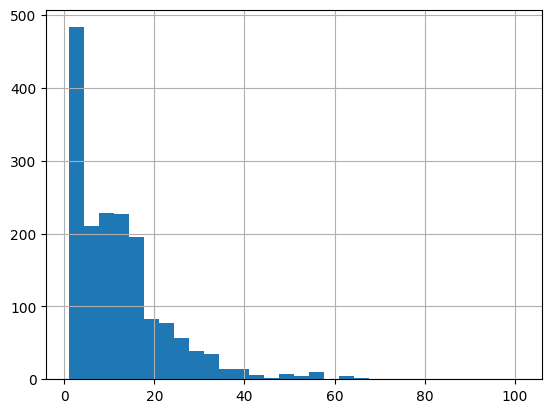

In [5]:
train_df.evidences.apply(lambda l:len(json.loads(l))).hist(bins=30)

<Axes: >

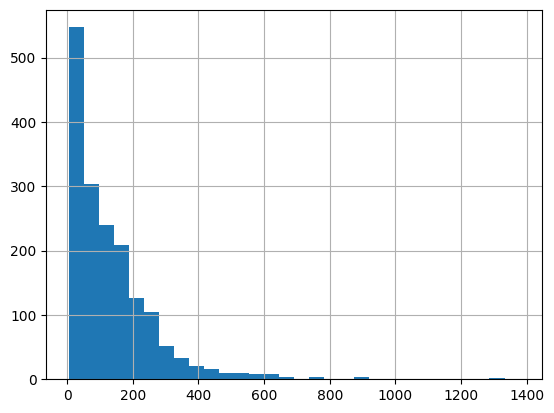

In [6]:
train_df.evidences.apply(lambda l:len(' '.join(json.loads(l)).split(' '))).hist(bins=30)

In [7]:
import json
from os.path import isfile

hypothesis_evidence_lst=[]
with open('/kaggle/input/nlp-project-dataset/Training data/dev.json','r') as f:
    train_json=json.load(f)
    for k in train_json:
        line=train_json[k]
#         if isfile('../data/Training_data/CT json/{}.json'.format(line['Primary_id'])):
        premises=json.load(open('/kaggle/input/nlp-project-dataset/Training data/CT json/{}.json'.format(line['Primary_id'])))
        hypothesis_evidence_lst.append([
            line['Statement'],
            json.dumps([premises[line['Section_id']][idx] for idx in line['Primary_evidence_index']]),
            line['Label']
        ])
        if 'Secondary_id' in line:
            premises=json.load(open('/kaggle/input/nlp-project-dataset/Training data/CT json/{}.json'.format(line['Secondary_id'])))
            hypothesis_evidence_lst[-1][1]=json.dumps(
                json.loads(hypothesis_evidence_lst[-1][1])+[premises[line['Section_id']][idx] for idx in line['Secondary_evidence_index']]
            )

In [8]:
import pandas as pd

dev_df=pd.DataFrame(hypothesis_evidence_lst,columns=['hypothesis','evidences','label'])
dev_df

,hypothesis,evidences,label
0,there is a 13.2% difference between the result...,"[""Outcome Measurement: "", "" Event-free Surviv...",Contradiction
1,Patients with significantly elevated ejection ...,"["" Cardiac left ventricular function with res...",Contradiction
2,a significant number of the participants in th...,"["" Enterocolitis 1/167 (0.60%)"", "" Enterocol...",Contradiction
3,the primary trial does not report the PFS or o...,"[""Outcome Measurement: "", "" Local Control Usi...",Entailment
4,Prior treatment with fulvestrant or with a pho...,"["" Prior treatment with a phosphatidylinosito...",Contradiction
...,...,...,...
195,The the primary trial intervention involves on...,"[""INTERVENTION 1: "", "" Letrozole"", "" Partici...",Contradiction
196,the secondary trial reported 1 single case of ...,"[""Adverse Events 1:"", "" Total: 16/48 (33.33%)...",Entailment
197,the secondary trial and the primary trial do n...,"[""Outcome Measurement: "", "" Number of Patient...",Entailment
198,the outcome measurement of the primary trial i...,"[""Outcome Measurement: "", "" Progression-free ...",Entailment


In [9]:
with open('/kaggle/input/nlp-project-dataset/Training data/test.json', 'r') as f:
    train_json = json.load(f)
    for k in train_json:
        line = train_json[k]
        primary_evidence = []
        if 'Primary_evidence_index' in line:
            premises = json.load(open(f'/kaggle/input/nlp-project-dataset/Training data/CT json/{line["Primary_id"]}.json'))
            primary_evidence = [premises[line['Section_id']][idx] for idx in line['Primary_evidence_index']]

        # Handle missing 'Label'
        label = line.get('Label', 'default_label')  # Or skip entry with 'continue' if no default can be applied

        hypothesis_evidence_lst.append([
            line['Statement'],
            json.dumps(primary_evidence),
            label
        ])

        # Handle missing 'Secondary_id' or 'Secondary_evidence_index'
        if 'Secondary_id' in line and 'Secondary_evidence_index' in line:
            premises = json.load(open(f'/kaggle/input/nlp-project-dataset/Training data/CT json/{line["Secondary_id"]}.json'))
            secondary_evidence = []
            if 'Secondary_evidence_index' in line:  # Check if 'Secondary_evidence_index' exists
                secondary_evidence = [premises[line['Section_id']][idx] for idx in line['Secondary_evidence_index']]
            else:
                print(f"Missing 'Secondary_evidence_index' for entry: {k}")
                # Optionally handle or log missing Secondary_evidence_index
            combined_evidence = json.loads(hypothesis_evidence_lst[-1][1]) + secondary_evidence
            hypothesis_evidence_lst[-1][1] = json.dumps(combined_evidence)


In [10]:
import pandas as pd

test_df=pd.DataFrame(hypothesis_evidence_lst,columns=['hypothesis','evidences','label'])
test_df

,hypothesis,evidences,label
0,there is a 13.2% difference between the result...,"[""Outcome Measurement: "", "" Event-free Surviv...",Contradiction
1,Patients with significantly elevated ejection ...,"["" Cardiac left ventricular function with res...",Contradiction
2,a significant number of the participants in th...,"["" Enterocolitis 1/167 (0.60%)"", "" Enterocol...",Contradiction
3,the primary trial does not report the PFS or o...,"[""Outcome Measurement: "", "" Local Control Usi...",Entailment
4,Prior treatment with fulvestrant or with a pho...,"["" Prior treatment with a phosphatidylinosito...",Contradiction
...,...,...,...
695,alcoholic patients are excluded from the prima...,[],default_label
696,Patients with a histologically/cytologically c...,[],default_label
697,the primary trial treats one of its patient co...,[],default_label
698,after a month of TAK-228 Plus Tamoxifen treatm...,[],default_label


In [11]:
len(train_df),len(dev_df),len(test_df)

(1700, 200, 700)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

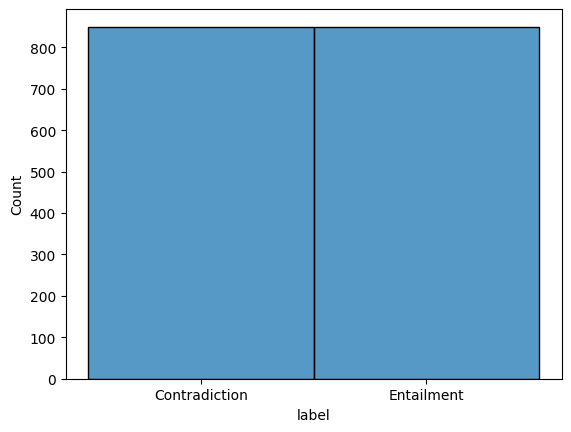

In [12]:
import seaborn as sns
sns.histplot(data=train_df, x="label")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

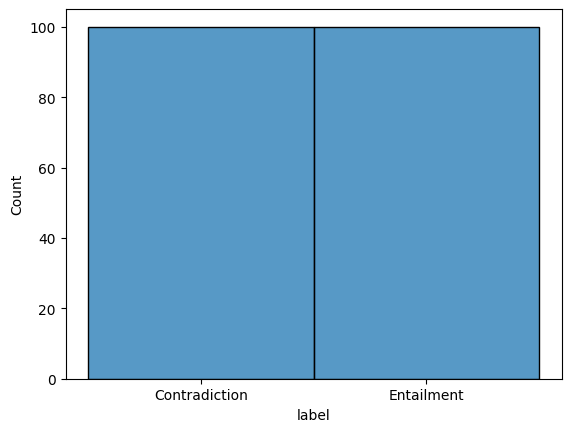

In [13]:
sns.histplot(data=dev_df, x="label")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

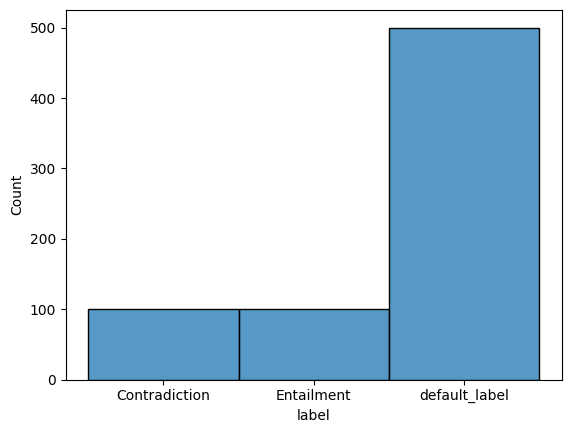

In [14]:
sns.histplot(data=test_df, x="label")

In [15]:
with open('/kaggle/input/nlp-project-dataset/Training data/Numerical.json', 'r') as f:
    train_json = json.load(f)
    for k in train_json:
        line = train_json[k]
        primary_evidence = []
        if 'Primary_evidence_index' in line:
            premises = json.load(open(f'/kaggle/input/nlp-project-dataset/Training data/CT json/{line["Primary_id"]}.json'))
            primary_evidence = [premises[line['Section_id']][idx] for idx in line['Primary_evidence_index']]

        # Handle missing 'Label'
        label = line.get('Label', 'default_label')  # Or skip entry with 'continue' if no default can be applied

        hypothesis_evidence_lst.append([
            line['Statement'],
            json.dumps(primary_evidence),
            label
        ])

        # Handle missing 'Secondary_id' or 'Secondary_evidence_index'
        if 'Secondary_id' in line and 'Secondary_evidence_index' in line:
            premises = json.load(open(f'/kaggle/input/nlp-project-dataset/Training data/CT json/{line["Secondary_id"]}.json'))
            secondary_evidence = []
            if 'Secondary_evidence_index' in line:  # Check if 'Secondary_evidence_index' exists
                secondary_evidence = [premises[line['Section_id']][idx] for idx in line['Secondary_evidence_index']]
            else:
                print(f"Missing 'Secondary_evidence_index' for entry: {k}")
                # Optionally handle or log missing Secondary_evidence_index
            combined_evidence = json.loads(hypothesis_evidence_lst[-1][1]) + secondary_evidence
            hypothesis_evidence_lst[-1][1] = json.dumps(combined_evidence)


In [16]:
import pandas as pd

num_df=pd.DataFrame(hypothesis_evidence_lst,columns=['hypothesis','evidences','label'])
num_df

,hypothesis,evidences,label
0,there is a 13.2% difference between the result...,"[""Outcome Measurement: "", "" Event-free Surviv...",Contradiction
1,Patients with significantly elevated ejection ...,"["" Cardiac left ventricular function with res...",Contradiction
2,a significant number of the participants in th...,"["" Enterocolitis 1/167 (0.60%)"", "" Enterocol...",Contradiction
3,the primary trial does not report the PFS or o...,"[""Outcome Measurement: "", "" Local Control Usi...",Entailment
4,Prior treatment with fulvestrant or with a pho...,"["" Prior treatment with a phosphatidylinosito...",Contradiction
...,...,...,...
982,"Breast cancer patients with estrogen negative,...",[],Entailment
983,the primary trial patients in The paced respir...,[],Entailment
984,alcoholic patients are excluded from the prima...,[],Contradiction
985,the primary trial treats one of its patient co...,[],Entailment


In [17]:
with open('/kaggle/input/nlp-project-dataset/Training data/gold_test.json', 'r') as f:
    train_json = json.load(f)
    for k in train_json:
        line = train_json[k]
        primary_evidence = []
        if 'Primary_evidence_index' in line:
            premises = json.load(open(f'/kaggle/input/nlp-project-dataset/Training data/CT json/{line["Primary_id"]}.json'))
            primary_evidence = [premises[line['Section_id']][idx] for idx in line['Primary_evidence_index']]

        # Handle missing 'Label'
        label = line.get('Label', 'default_label')  # Or skip entry with 'continue' if no default can be applied

        hypothesis_evidence_lst.append([
            line['Statement'],
            json.dumps(primary_evidence),
            label
        ])

        # Handle missing 'Secondary_id' or 'Secondary_evidence_index'
        if 'Secondary_id' in line and 'Secondary_evidence_index' in line:
            premises = json.load(open(f'/kaggle/input/nlp-project-dataset/Training data/CT json/{line["Secondary_id"]}.json'))
            secondary_evidence = []
            if 'Secondary_evidence_index' in line:  # Check if 'Secondary_evidence_index' exists
                secondary_evidence = [premises[line['Section_id']][idx] for idx in line['Secondary_evidence_index']]
            else:
                print(f"Missing 'Secondary_evidence_index' for entry: {k}")
                # Optionally handle or log missing Secondary_evidence_index
            combined_evidence = json.loads(hypothesis_evidence_lst[-1][1]) + secondary_evidence
            hypothesis_evidence_lst[-1][1] = json.dumps(combined_evidence)


In [18]:
import pandas as pd

gold_test_df=pd.DataFrame(hypothesis_evidence_lst,columns=['hypothesis','evidences','label'])
gold_test_df

,hypothesis,evidences,label
0,there is a 13.2% difference between the result...,"[""Outcome Measurement: "", "" Event-free Surviv...",Contradiction
1,Patients with significantly elevated ejection ...,"["" Cardiac left ventricular function with res...",Contradiction
2,a significant number of the participants in th...,"["" Enterocolitis 1/167 (0.60%)"", "" Enterocol...",Contradiction
3,the primary trial does not report the PFS or o...,"[""Outcome Measurement: "", "" Local Control Usi...",Entailment
4,Prior treatment with fulvestrant or with a pho...,"["" Prior treatment with a phosphatidylinosito...",Contradiction
...,...,...,...
6482,"secondary peripheral chondrosarcoma, grade 2 i...",[],Contradiction
6483,all patients in the primary trial receive at l...,[],Entailment
6484,"grade 1 acoustic nerve disorder nos, ctcae is ...",[],Contradiction
6485,simultaneous participation in both the primary...,[],Contradiction


In [ ]:
train_df.to_csv('train_hypothesis_evidences.csv',index=False)

In [ ]:
dev_df.to_csv('dev_hypothesis_evidences.csv',index=False)

In [ ]:
test_df.to_csv('test_hypothesis_evidences.csv',index=False)

In [ ]:
num_df.to_csv('numerical_hypothesis_evidences.csv',index=False)

In [19]:
gold_test_df.to_csv('gold_test_hypothesis_evidences.csv',index=False)